<h1>Imports</h1>

In [1]:
import pandas as pd
import os,sys
from tensorflow import keras 
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
from string import digits
from tqdm import tqdm
import numpy as np
from tensorflow.keras import datasets, layers, models
# 
os.chdir(r'C:\Users\MMOHTASHIM\Anaconda3\libs\Small Data Science projects\Small-Data-Science-Projects\Image classification competition')

<h2>Reading the file </h2>

In [2]:
labels=pd.read_csv("trainLabels.csv")

In [3]:
labels.head()
label=labels["label"].tolist()
set(label)
Cleaning=False

<h3>Changing the filename to desired Labels</h3>
Multiplies instance of same image were given unique names by attaching a unique number to each label e.g frog21,frog33,truck22,truck223.

In [4]:
#Changing the filename
os.chdir(r"C:\Users\MMOHTASHIM\Anaconda3\libs\Small Data Science projects\Small-Data-Science-Projects\Image classification competition\train")
directory=(r"C:\Users\MMOHTASHIM\Anaconda3\libs\Small Data Science projects\Small-Data-Science-Projects\Image classification competition\train")
if Cleaning:
    for i in range(1,50001):
            os.rename(str(i)+'.png',label[i-1]+"{}".format(i-1)+".png")


<h4>Redundant method</h4>
I tried to resize and convert the images onto a grayscale but this method was a failure,attached code is just for reference.

In [5]:
path = r'C:\Users\MMOHTASHIM\Anaconda3\libs\Small Data Science projects\Small-Data-Science-Projects\Image classification competition\edited_3'
os.chdir(path)
if Cleaning:##Not usefull method ,combine converting images and making assoicated arrays together is better as shown below
    for filename in os.listdir(dircetory):
        file='\{}'.format(filename)
        dirs=os.path.join(directory+file)
        img_rgb = cv2.imread(dirs)
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
        im_ff=cv2.resize(img_gray,(24,24))
        cv2.imwrite(filename, im_ff)
    
    


<h5>Making the data</h5>
I directly read the files(images),converted the images' data into an 3D-Array. The exception was given so that the data making process is not stopped due to corrput file(which is always a possibility).Please note as mentioned there are multiplies instance of frog(label) so I named different images of frog with a unique number e.g frog212,frog211.Therefore I read the filename and I removed the digits from the filename(which now,after removing numbers, is actually the label). I then threw some if/elif statement to one-hot ecode the different labels and inserted that data on 1D array.

In [6]:
###
if Cleaning:
    X=[]
    y=[]
    os.chdir(r'C:\Users\MMOHTASHIM\Anaconda3\libs\Small Data Science projects\Small-Data-Science-Projects\Image classification competition')
    for filename in tqdm(os.listdir(path)):
        file='\{}'.format(filename)
        dirs=os.path.join(path+file)
        try:
            img_rgb = cv2.imread(dirs)
            X.append(list(img_rgb))
        except TypeError:
            continue
        remove_digits = str.maketrans('', '', digits)
        res = filename.translate(remove_digits)
        if 'airplane.png'==res:
            y.append([1,0,0,0,0,0,0,0,0,0])
        elif 'automobile.png'==res:
            y.append([0,1,0,0,0,0,0,0,0,0])
        elif 'bird.png'==res:
            y.append([0,0,1,0,0,0,0,0,0,0])
        elif 'cat.png'==res:
            y.append([0,0,0,1,0,0,0,0,0,0])
        elif 'deer.png'==res:
            y.append([0,0,0,0,1,0,0,0,0,0])
        elif 'dog.png'==res:
            y.append([0,0,0,0,0,1,0,0,0,0])
        elif 'frog.png'==res:
            y.append([0,0,0,0,0,0,1,0,0,0])
        elif 'horse.png'==res:
            y.append([0,0,0,0,0,0,0,1,0,0])
        elif 'ship.png'==res:
            y.append([0,0,0,0,0,0,0,0,1,0])
        elif 'truck.png'==res:
            y.append([0,0,0,0,0,0,0,0,0,1])
    X=np.array(X)
    y=np.array(y)
    np.save("X_ARR",X)
    np.save("y_ARR",y)

        
        

In [8]:
os.chdir(r'C:\Users\MMOHTASHIM\Anaconda3\libs\Small Data Science projects\Small-Data-Science-Projects\Image classification competition')
X=np.load("X_ARR.npy")
y=np.load("y_ARR.npy")
X.shape,y.shape

((50000, 32, 32, 3), (50000, 10))

<h6>Creating A Convolutional Neural Network</h6>
Rest of code is self-explanationary. I created the CNN using TensorFlow2.0. Please note I used Dropout to avoid over-fitting.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_valid,y_valid=X_train[-33:],y_train[-33:]

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='valid',input_shape=(32, 32, 3)))
model.add(layers.Dropout(.1, noise_shape=None, seed=None))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(.1, noise_shape=None, seed=None))
model.add(layers.Conv2D(64, (3, 3), padding='valid',activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(.2, noise_shape=None, seed=None))
model.add(layers.Conv2D(64, (3, 3), padding='valid',activation='relu'))

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

<font size="+2">CNN Architecture</font>

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 64)          0

<font size="+2">CNN Parameter</font>

In [1]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
save_best_only=True)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X, y, epochs=25,
validation_data=(X_valid, y_valid),
callbacks=[checkpoint_cb])

"Model Trained"

'Model Trained'

<font size="+2">Graphical visualisation of Loss and Accuracy</font>

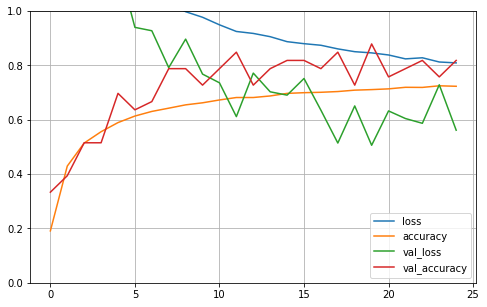

In [14]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

<font size="+2">Testing my CNN on some random Images(from Trained Data)</font>

<IPython.core.display.Javascript object>


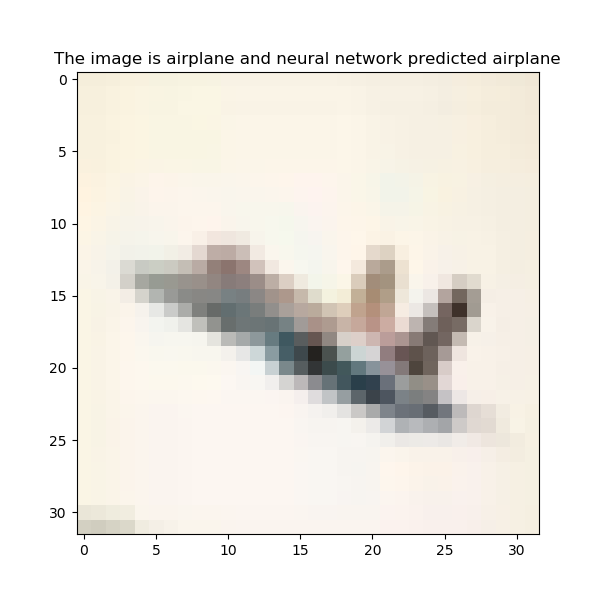

15936/50000 [========>.....................] - ETA: 4:04 - loss: 0.4917 - accuracy: 0.87 - ETA: 1:48 - loss: 0.5635 - accuracy: 0.86 - ETA: 1:23 - loss: 0.5580 - accuracy: 0.84 - ETA: 1:11 - loss: 0.5939 - accuracy: 0.83 - ETA: 59s - loss: 0.6114 - accuracy: 0.8094 - ETA: 53s - loss: 0.6143 - accuracy: 0.807 - ETA: 50s - loss: 0.6449 - accuracy: 0.793 - ETA: 47s - loss: 0.6478 - accuracy: 0.794 - ETA: 45s - loss: 0.6530 - accuracy: 0.789 - ETA: 43s - loss: 0.6483 - accuracy: 0.790 - ETA: 42s - loss: 0.6336 - accuracy: 0.798 - ETA: 41s - loss: 0.6328 - accuracy: 0.800 - ETA: 41s - loss: 0.6249 - accuracy: 0.802 - ETA: 41s - loss: 0.6218 - accuracy: 0.802 - ETA: 40s - loss: 0.6276 - accuracy: 0.801 - ETA: 39s - loss: 0.6298 - accuracy: 0.798 - ETA: 38s - loss: 0.6238 - accuracy: 0.800 - ETA: 37s - loss: 0.6106 - accuracy: 0.805 - ETA: 37s - loss: 0.6020 - accuracy: 0.808 - ETA: 36s - loss: 0.5960 - accuracy: 0.810 - ETA: 36s - loss: 0.5922 - accuracy: 0.813 - ETA: 36s - loss: 0.5914 - ac

32704/50000 [==================>...........] - ETA: 23s - loss: 0.6675 - accuracy: 0.766 - ETA: 23s - loss: 0.6701 - accuracy: 0.765 - ETA: 23s - loss: 0.6730 - accuracy: 0.763 - ETA: 23s - loss: 0.6744 - accuracy: 0.763 - ETA: 23s - loss: 0.6770 - accuracy: 0.761 - ETA: 23s - loss: 0.6786 - accuracy: 0.760 - ETA: 23s - loss: 0.6799 - accuracy: 0.759 - ETA: 23s - loss: 0.6815 - accuracy: 0.759 - ETA: 23s - loss: 0.6839 - accuracy: 0.758 - ETA: 23s - loss: 0.6860 - accuracy: 0.757 - ETA: 23s - loss: 0.6881 - accuracy: 0.756 - ETA: 23s - loss: 0.6901 - accuracy: 0.755 - ETA: 23s - loss: 0.6928 - accuracy: 0.754 - ETA: 23s - loss: 0.6941 - accuracy: 0.754 - ETA: 22s - loss: 0.6969 - accuracy: 0.752 - ETA: 22s - loss: 0.7001 - accuracy: 0.751 - ETA: 22s - loss: 0.7018 - accuracy: 0.750 - ETA: 22s - loss: 0.7038 - accuracy: 0.749 - ETA: 22s - loss: 0.7061 - accuracy: 0.748 - ETA: 22s - loss: 0.7069 - accuracy: 0.748 - ETA: 22s - loss: 0.7089 - accuracy: 0.747 - ETA: 22s - loss: 0.7116 - acc

49088/50000 [============================>.] - ETA: 11s - loss: 0.7266 - accuracy: 0.745 - ETA: 11s - loss: 0.7257 - accuracy: 0.746 - ETA: 11s - loss: 0.7251 - accuracy: 0.746 - ETA: 11s - loss: 0.7246 - accuracy: 0.746 - ETA: 11s - loss: 0.7235 - accuracy: 0.747 - ETA: 11s - loss: 0.7224 - accuracy: 0.747 - ETA: 11s - loss: 0.7219 - accuracy: 0.747 - ETA: 11s - loss: 0.7209 - accuracy: 0.748 - ETA: 11s - loss: 0.7198 - accuracy: 0.748 - ETA: 11s - loss: 0.7191 - accuracy: 0.748 - ETA: 11s - loss: 0.7184 - accuracy: 0.749 - ETA: 11s - loss: 0.7177 - accuracy: 0.749 - ETA: 11s - loss: 0.7173 - accuracy: 0.749 - ETA: 11s - loss: 0.7167 - accuracy: 0.749 - ETA: 11s - loss: 0.7162 - accuracy: 0.750 - ETA: 11s - loss: 0.7156 - accuracy: 0.750 - ETA: 11s - loss: 0.7146 - accuracy: 0.750 - ETA: 11s - loss: 0.7138 - accuracy: 0.751 - ETA: 10s - loss: 0.7133 - accuracy: 0.751 - ETA: 10s - loss: 0.7124 - accuracy: 0.751 - ETA: 10s - loss: 0.7118 - accuracy: 0.751 - ETA: 10s - loss: 0.7108 - acc

50000/50000 [==============================] - ETA: 0s - loss: 0.6485 - accuracy: 0.78 - ETA: 0s - loss: 0.6484 - accuracy: 0.78 - ETA: 0s - loss: 0.6483 - accuracy: 0.78 - ETA: 0s - loss: 0.6478 - accuracy: 0.78 - ETA: 0s - loss: 0.6476 - accuracy: 0.78 - ETA: 0s - loss: 0.6471 - accuracy: 0.78 - ETA: 0s - loss: 0.6467 - accuracy: 0.78 - ETA: 0s - loss: 0.6467 - accuracy: 0.78 - ETA: 0s - loss: 0.6463 - accuracy: 0.78 - 35s 698us/sample - loss: 0.6461 - accuracy: 0.7815
Train score: 0.6461049483633041
Train accuracy: 0.78154


In [29]:
# clf.predict_classes(X_train)
import random
%matplotlib notebook
results_key={"airplane":[1,0,0,0,0,0,0,0,0,0],"automobile":[0,1,0,0,0,0,0,0,0,0],
            "bird":[0,0,1,0,0,0,0,0,0,0],"cat":[0,0,0,1,0,0,0,0,0,0],
            'deer':[0,0,0,0,1,0,0,0,0,0],"dog":[0,0,0,0,0,1,0,0,0,0],
            "frog":[0,0,0,0,0,0,1,0,0,0],"horse":[0,0,0,0,0,0,0,1,0,0],
            "ship":[0,0,0,0,0,0,0,0,1,0],"truck":[0,0,0,0,0,0,0,0,0,1]}
model = keras.models.load_model("my_keras_model.h5")
figure=plt.figure(figsize=(6,6))
ax1=figure.add_subplot(111)
number_img=int(random.uniform(0,len(X_test)))

ax1.imshow(X[number_img])
y_orginal=y[number_img]
key_predicted=model.predict_classes(X[number_img:number_img+1])[0]


key_orginal=np.argmax(y_orginal)
# key_predicted=np.argmax(y_predicted)

keys=list(results_key.keys())

label_orginal=keys[key_orginal]
label_predicted=keys[key_predicted]
plt.title("The image is {} and neural network predicted {}".format(label_orginal,label_predicted))
score, acc = model.evaluate(X,y)
print('Train score:', score)
print('Train accuracy:', acc)

<font size="+2">Making X_test Data which will be feed into my CNN</font>

In [1]:
X_test=[]
test_dir=(r'C:\Users\MMOHTASHIM\Anaconda3\libs\Small Data Science projects\Small-Data-Science-Projects\Image classification competition\test')
for filename in tqdm(range(1,300000+1)):
        filename=str(filename)
        file='\{}.png'.format(filename)
        dirs=os.path.join(test_dir+file)
        try:
            img_rgb = cv2.imread(dirs)
            X_test.append(list(img_rgb))
        except TypeError:
            continue
X_test=np.array(X_test)
np.save("X_test_Arr",X_test)
"X_Data Generated and Saved"

'X_Data Generated and Saved'

<font size="+2">Predicting the Test Set of Images and created Kaggle submission File</font>

In [2]:
os.chdir(r'C:\Users\MMOHTASHIM\Anaconda3\libs\Small Data Science projects\Small-Data-Science-Projects\Image classification competition')
X_test=np.load("X_test_Arr.npy")
y_test=[]
keys=list(results_key.keys())
key_predicted=model.predict_classes(X_test)
for i in tqdm(key_predicted):
    y_test.append(keys[i])
df=pd.DataFrame()
df["label"]=np.array(y_test)
df.to_csv("sub_2.csv")
"Kaggle File Made"

'Kaggle File Made'